In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('tips', engine='python')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
#######################################################################################################################################
#---------------------------------------------------- EDA (탐색적 데이터 분석) -------------------------------------------------------#
########################################################################################################################################

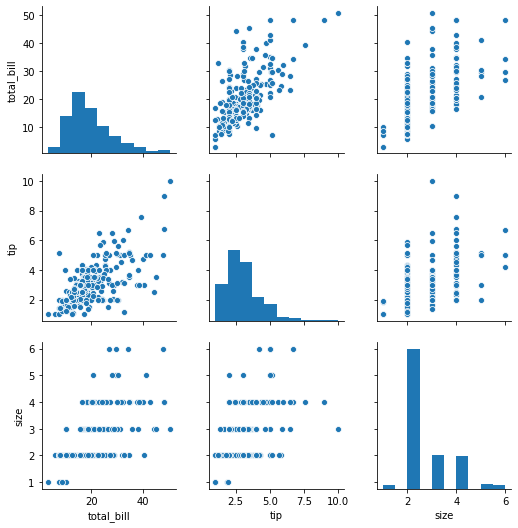

In [3]:
sns.pairplot(df, palette="muted", diag_kind='hist')

In [4]:
# 결측치 확인 > 없음
import numpy as np
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [5]:
# 이상치 제거 method = z-score
import numpy as np
df.loc[:,'out'] = 0
for c in df.columns[[0,1,6]]:
    z = (df[c] - df[c].mean()) / df[c].std(ddof=0) 
    thr = 2.58
    
    df.loc[abs(z)>=thr,'out'] = 1

print(f'이상치가 있는 관측치의 개수: {df.out.sum()}')

df1 = df.drop(df[df['out']==1].index)

이상치가 있는 관측치의 개수: 11


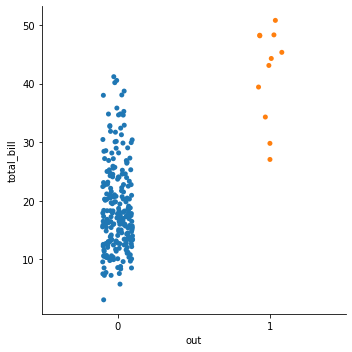

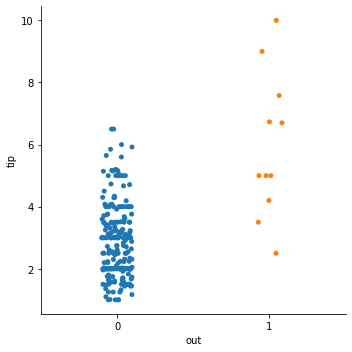

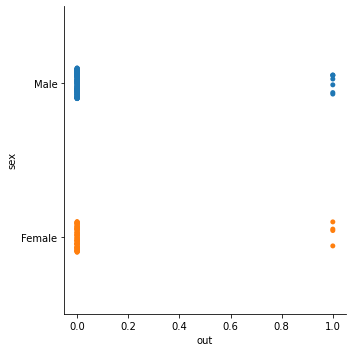

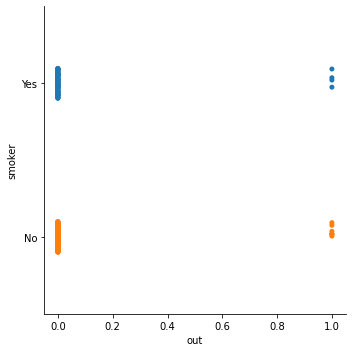

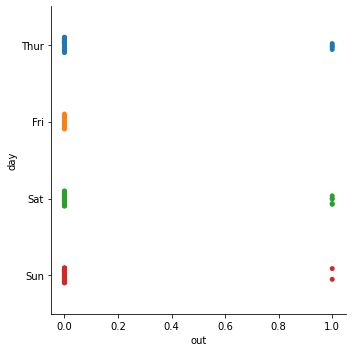

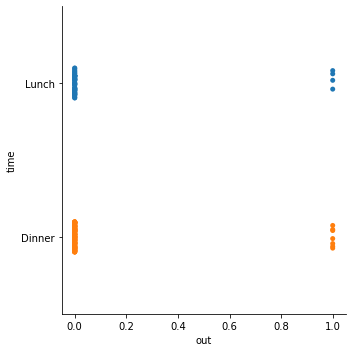

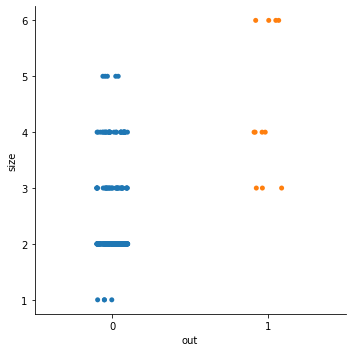

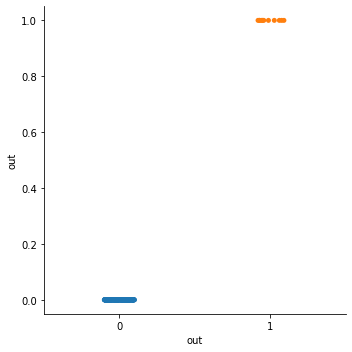

In [6]:
# 이상치 plot
for i in range(len(df.columns)):
    sns.catplot(x='out',y=df.columns[i],data=df)

In [7]:
df = df1
df.drop('out',axis=1,inplace=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
######################################################################################################################################
#---------------------------------------------------------- Clustering----------------------------------------------------------------#
########################################################################################################################################

In [9]:
# 범주형 독립변수를 수치형으로 변환. 이때 이항 범주라면 0과 1로, 다항이라면 one-hot encoding하겠음
print(len(np.unique(df.sex)))
print(len(np.unique(df.smoker)))
print(len(np.unique(df.day)))
print(len(np.unique(df.time)))

2
2
4
2


In [10]:
# 0과 1로 변환 
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder()
df.sex = classle.fit_transform(df.sex)
df.smoker = classle.fit_transform(df.smoker)
df.time = classle.fit_transform(df.time)

In [11]:
day = pd.get_dummies(df.day)
df = pd.concat((df,day),axis=1)
df.head()

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun
0,16.99,1.01,0,0,Sun,0,2,0,0,0,1
1,10.34,1.66,1,0,Sun,0,3,0,0,0,1
2,21.01,3.50,1,0,Sun,0,3,0,0,0,1
3,23.68,3.31,1,0,Sun,0,2,0,0,0,1
4,24.59,3.61,0,0,Sun,0,4,0,0,0,1


In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun
0,16.99,1.01,0,0,Sun,0,2,0,0,0,1
1,10.34,1.66,1,0,Sun,0,3,0,0,0,1
2,21.01,3.50,1,0,Sun,0,3,0,0,0,1
3,23.68,3.31,1,0,Sun,0,2,0,0,0,1
4,24.59,3.61,0,0,Sun,0,4,0,0,0,1


In [13]:
df.drop('day',axis=1,inplace=True)
df.head()

,total_bill,tip,sex,smoker,time,size,Thur,Fri,Sat,Sun
0,16.99,1.01,0,0,0,2,0,0,0,1
1,10.34,1.66,1,0,0,3,0,0,0,1
2,21.01,3.50,1,0,0,3,0,0,0,1
3,23.68,3.31,1,0,0,2,0,0,0,1
4,24.59,3.61,0,0,0,4,0,0,0,1


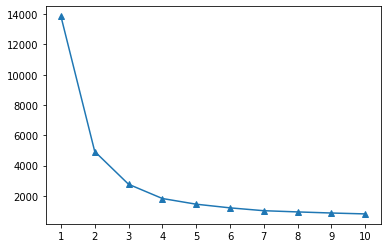

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow(df):
    sse = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(df.values)
        sse.append(kmeans.inertia_)
    plt.plot(range(1,11), sse, marker='^')
    plt.xticks(list(range(1,11)))
    
elbow(df) # k=3

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.values)

df['cluster_id'] = kmeans.labels_
df.tail()

,total_bill,tip,sex,smoker,time,size,Thur,Fri,Sat,Sun,cluster_id
239,29.03,5.92,1,0,0,3,0,0,1,0,1
240,27.18,2.00,0,1,0,2,0,0,1,0,1
241,22.67,2.00,1,1,0,2,0,0,1,0,2
242,17.82,1.75,1,0,0,2,0,0,1,0,2
243,18.78,3.00,0,0,0,2,1,0,0,0,2


<Figure size 288x4320 with 0 Axes>

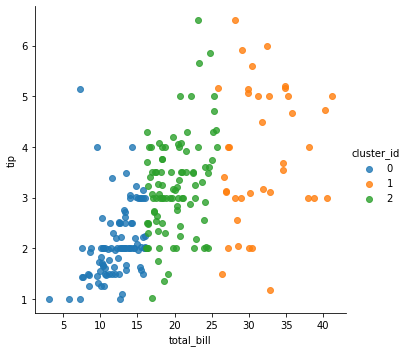

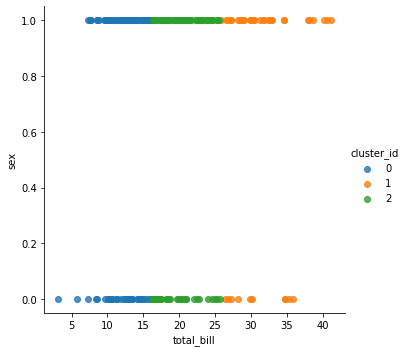

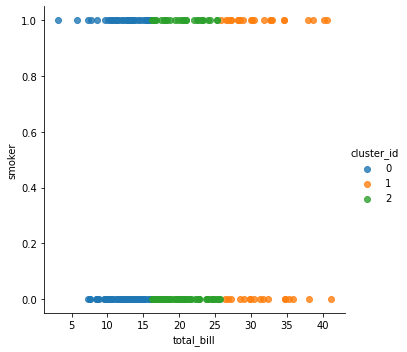

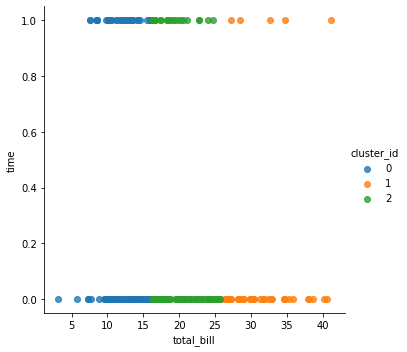

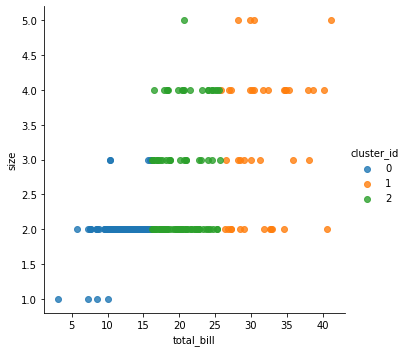

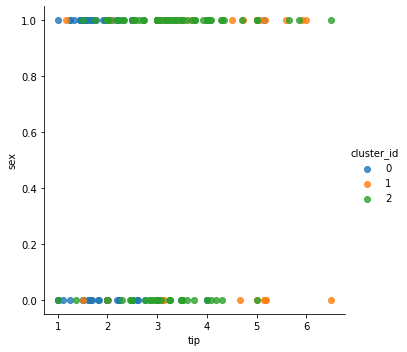

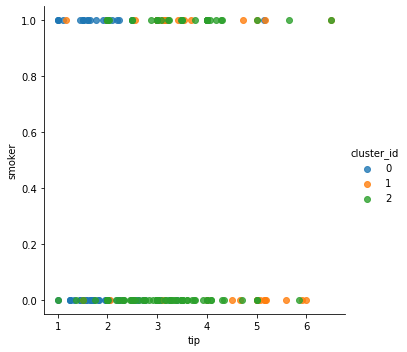

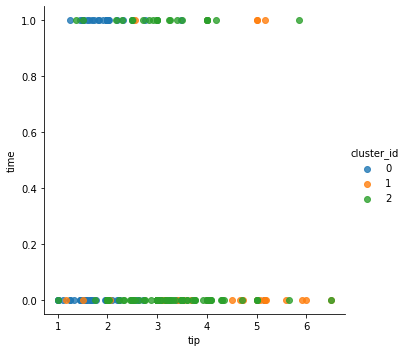

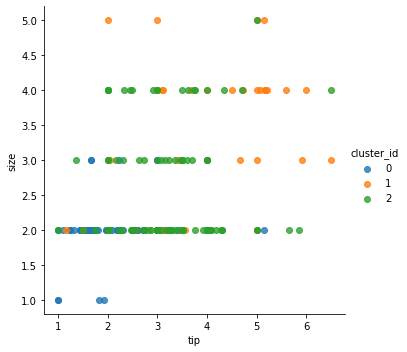

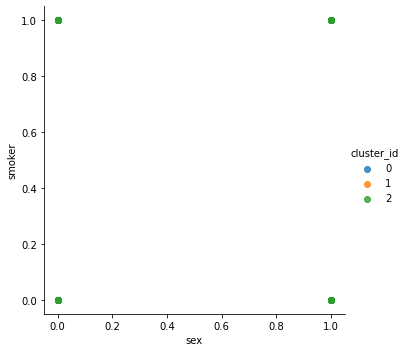

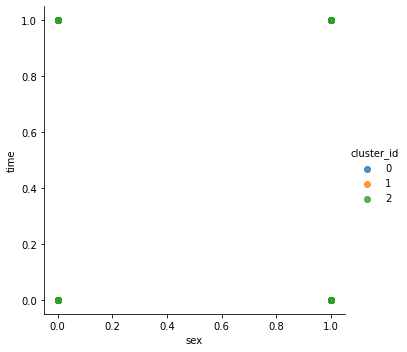

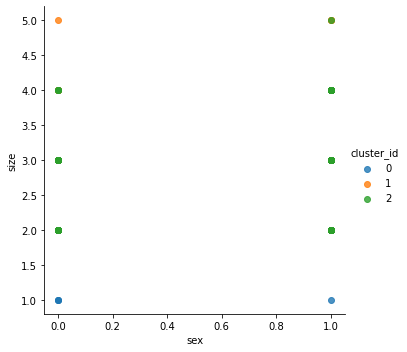

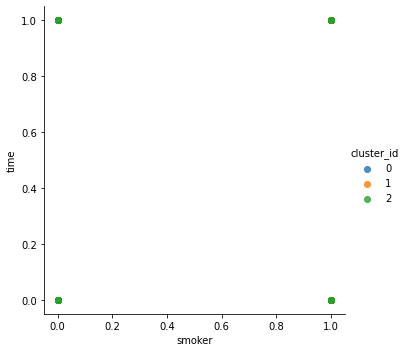

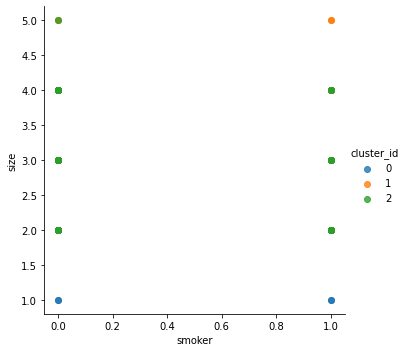

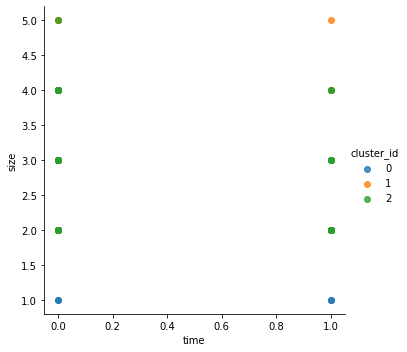

In [16]:
# clustering 결과. day는 빼고 그릴게요 
n = len(df.columns)-5
m = n*(n-1)/2

plt.figure(figsize=(4,4*m))
cnt = 1 

for i in range(n):  
    for j in range(i+1,n):    
        sns.lmplot(df.columns[i],df.columns[j], data=df, hue='cluster_id', fit_reg=False)

In [17]:
############# penguin #################

In [18]:
peng = sns.load_dataset('penguins', engine='python')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [19]:
peng = peng.dropna()

In [20]:
# 이상치 제거 method = z-score
import numpy as np
peng.loc[:,'out'] = 0
for c in peng.columns[[2,3,4,5]]:
    z = (peng[c] - peng[c].mean()) / peng[c].std(ddof=0) 
    thr = 2.58
    
    peng.loc[abs(z)>=thr,'out'] = 1

print(f'이상치가 있는 관측치의 개수: {peng.out.sum()}')

peng1 = peng.drop(peng[peng['out']==1].index)

peng = peng1
peng = peng.drop('out',axis=1)

이상치가 있는 관측치의 개수: 2


In [21]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [22]:
peng.island = classle.fit_transform(peng.island)
peng.sex = classle.fit_transform(peng.sex)
species = pd.get_dummies(peng.species)
peng = pd.concat((peng,species),axis=1)
peng = peng.drop('species',axis=1)
peng.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo
0,2,39.1,18.7,181.0,3750.0,1,1,0,0
1,2,39.5,17.4,186.0,3800.0,0,1,0,0
2,2,40.3,18.0,195.0,3250.0,0,1,0,0
4,2,36.7,19.3,193.0,3450.0,0,1,0,0
5,2,39.3,20.6,190.0,3650.0,1,1,0,0


In [23]:
x = peng.drop('island',axis=1)
y = peng['island']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=1, stratify=y)

In [25]:
from sklearn.linear_model import LogisticRegression

# Softmax 
Logit = LogisticRegression(multi_class='multinomial',C=0.1, random_state=1,max_iter=5000)   
Logit.fit(X_train,y_train)
y_test_pred = Logit.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred)) 

0.7


In [27]:
# Sigmoid 
Logit2 = LogisticRegression(multi_class='ovr',C=0.1, random_state=1,max_iter=5000)   
Logit2.fit(X_train,y_train)
y_test_pred2 = Logit2.predict(X_test)

In [28]:
print(accuracy_score(y_test,y_test_pred2)) 

0.72
